In [2]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
import seaborn as sns
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [3]:
#Classifying Imports
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
Weekly = load_data("Weekly")
Weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [5]:
Numerical_Data = Weekly.drop(columns = "Direction")

<Axes: >

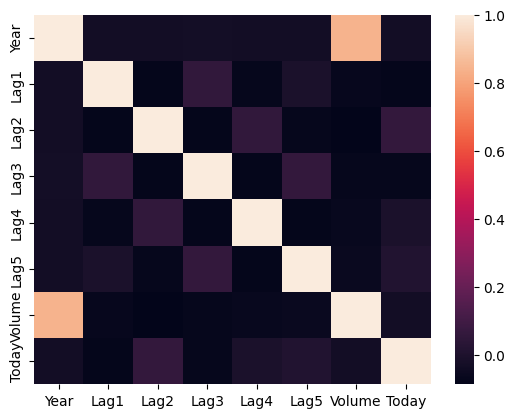

In [6]:
sns.heatmap(Numerical_Data.corr())

In [7]:
allvars = Weekly.columns.drop(["Today","Year","Direction"])
design = MS(allvars)
X = design.fit_transform(Weekly)
Y = Weekly.Direction == "Up"
gm = sm.GLM(Y,
            X,
            family = sm.families.Binomial())
results = gm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [8]:
results.pvalues

intercept    0.001899
Lag1         0.118144
Lag2         0.029601
Lag3         0.546924
Lag4         0.293653
Lag5         0.583348
Volume       0.537675
dtype: float64

In [9]:
probs = results.predict()
labels = np.array(["Down"]*1089)
labels[probs > 0.5] = "Up"
confusion_table(labels,Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


The Confusion Matrix has heavy bias towards predicting in the up Direction